In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

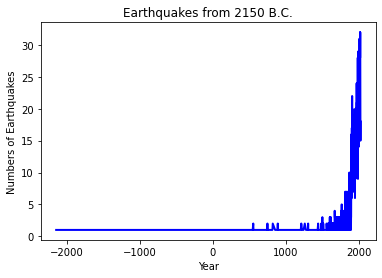

Please enter a country:CHINA
('CHINA', 610, 8.5,        Year   Mo    Dy
973  1668.0  7.0  25.0)


In [3]:
Sig_Eqs = pd.read_csv('earthquakes-2021-10-25_10-29-30_+0800.tsv',"engine = python3","\t")
Sig_Eqs
#1-1 Computer the total number of deaths in each country, print the top 10
Sig_Eqs.groupby('Country')['Deaths'].count().sort_values(ascending = False)[0:10]
#1-2 Computer the total number of earthquakes with magnitude larger than 6.0(Mag)
tdf1 = Sig_Eqs[Sig_Eqs['Mag']>6.0]
Aim = tdf1.groupby('Year')['Mag'].count()
Aim
plt.title('Earthquakes from 2150 B.C.')
plt.xlabel('Year')
plt.ylabel('Numbers of Earthquakes')
plt.plot(Aim, color='blue',linewidth=2.0)
plt.show()
#1-3 write a function CountEq_LargestEq total number of earthquakes and largest mag
import pandas as pd
def CountEq_LargestEq(P_country: str):
    Sig_Eqs = pd.read_csv('earthquakes-2021-10-25_10-29-30_+0800.tsv',"engine = python3","\t")
    Goal = Sig_Eqs['Mag'][Sig_Eqs['Country']==P_country].max()
    return P_country, Sig_Eqs['Country'][Sig_Eqs['Country']==P_country].count(), Goal, Sig_Eqs[['Year','Mo','Dy']][(Sig_Eqs['Mag']==Goal)&(Sig_Eqs['Country']==P_country)]
print(CountEq_LargestEq(input("Please enter a country:")))

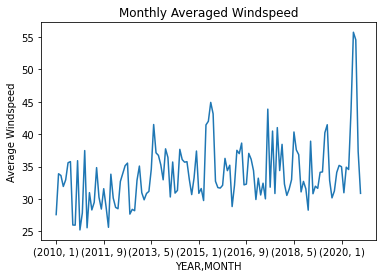

In [4]:
#2 monthly averaged wind speed as a function of the observation time. Trend?
W_S = pd.read_csv('2281305.csv',low_memory=False)
df1 = W_S['WND'].str.split(',', expand=True)
W_S['WindSpeed'] = df1[3]
W_S['WindSpeed_num'] = W_S['WindSpeed'].astype(int)
W_S['WindSpeed_num'].replace(9999,np.nan,inplace=True)
W_S['DATE'] = pd.to_datetime(W_S['DATE'])
W_S['YEAR'] = pd.to_datetime(W_S['DATE']).dt.year
W_S['MONTH'] = pd.to_datetime(W_S['DATE']).dt.month
W_S.groupby(['YEAR','MONTH']).mean()['WindSpeed_num'].plot()
plt.title('Monthly Averaged Windspeed')
plt.ylabel('Average Windspeed')
plt.show()

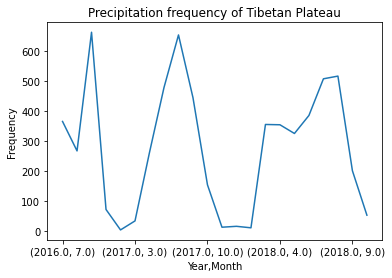

,#,Event,Year,Month,Day
count,6131.000000,6131.000000,6131.000000,6131.000000,6131.000000
mean,18368.998043,3064.207960,2017.233078,7.033437,16.162942
std,8834.070068,1769.726292,0.775221,1.963291,8.875523
min,1.000000,0.000000,2016.000000,1.000000,1.000000
25%,14606.500000,1531.500000,2017.000000,6.000000,9.000000
50%,18368.000000,3064.000000,2017.000000,7.000000,17.000000
75%,26288.500000,4596.500000,2018.000000,8.000000,24.000000
max,30622.000000,6129.000000,2018.000000,11.000000,31.000000


In [142]:
#3 Rain
#3-1 clean wrong data
Rain = pd.read_excel('PS3.xlsx')

Rain['Event'] = Rain['Event'].astype(int)
Rain[Rain['Event']==-999]=np.nan
#Rain['Event'].dropna()

#3-2 Precipitation frequency
Rain['Date'] = pd.to_datetime(Rain['Date'])
Rain['Year'] = pd.to_datetime(Rain['Date']).dt.year
Rain['Month'] = pd.to_datetime(Rain['Date']).dt.month
Rain['Day'] = pd.to_datetime(Rain['Date']).dt.day
Rain.dropna(axis=0,how='any')
Rain.describe()
Rain.groupby(['Year','Month'])['Event'].count().plot()
plt.title('Precipitation frequency of Tibetan Plateau')
plt.ylabel('Frequency')
plt.show()

#3-3 check
Rain.describe()


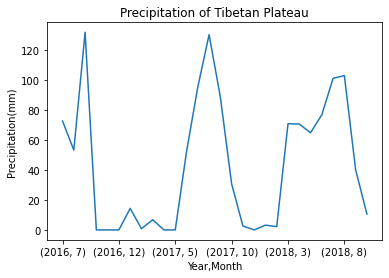

,#,Event,Precipitation,P,Year,Month,Day
count,30716.000000,30716.000000,30716.000000,30716.000000,30716.000000,30716.000000,30716.000000
mean,15358.458556,611.624528,0.199538,0.039908,2016.976332,7.031905,16.007325
std,8867.158582,1457.796170,0.399659,0.079932,0.803172,2.863551,8.866788
min,0.000000,0.000000,0.000000,0.000000,2016.000000,1.000000,1.000000
25%,7679.750000,0.000000,0.000000,0.000000,2016.000000,5.000000,8.000000
50%,15358.500000,0.000000,0.000000,0.000000,2017.000000,8.000000,16.000000
75%,23037.250000,0.000000,0.000000,0.000000,2018.000000,9.000000,24.000000
max,30716.000000,6129.000000,1.000000,0.200000,2018.000000,12.000000,31.000000


In [5]:
#3 Data solved by Excel
df1 = pd.read_excel('1027.xlsx')
df1['P'] = df1['Precipitation']*0.2
df1['Event'] = df1['Event'].astype(int)
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Year'] = pd.to_datetime(df1['Date']).dt.year
df1['Month'] = pd.to_datetime(df1['Date']).dt.month
df1['Day'] = pd.to_datetime(df1['Date']).dt.day
df1.groupby(['Year','Month'])['P'].sum().plot()
plt.ylabel('Precipitation(mm)')
plt.title('Precipitation of Tibetan Plateau')
plt.show()
df1.describe()